# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", "stooq", start, end)
# CitiGroup
C = data.DataReader("C", "stooq", start, end)
# Goldman Sachs
GS = data.DataReader("GS", "stooq", start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", "stooq", start, end)
# Morgan Stanley
MS = data.DataReader("MS", "stooq", start, end)
# Wells Fargo
WFC = data.DataReader("WFC", "stooq", start, end)

In [5]:
JPM

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,56.434,56.934,56.270,56.299,17186089.0
2015-12-30,57.158,57.165,56.653,56.774,8433004.0
2015-12-29,56.987,57.378,56.902,57.181,11518692.0
2015-12-28,56.517,56.653,56.024,56.596,7753421.0
2015-12-24,56.801,57.030,56.545,56.783,5240818.0
...,...,...,...,...,...
2006-01-09,29.839,30.468,29.839,30.430,22152519.0
2006-01-06,29.872,30.108,29.593,29.944,10639560.0
2006-01-05,29.635,29.787,29.557,29.734,10775615.0


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [179]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [180]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                           C          \
              Open    High     Low   Close      Volume    Open    High   
Date                                                                     
2006-01-03  40.981  41.205  40.308  41.120  18658143.0  431.01  434.32   
2006-01-04  41.051  41.263  40.570  40.684  20331205.0  429.79  431.88   
2006-01-05  40.684  40.903  40.458  40.737  16971119.0  426.06  429.05   
2006-01-06  40.875  40.971  40.485  40.675  14419805.0  429.95  430.10   
2006-01-09  40.806  41.025  40.492  40.702  17882700.0  427.47  428.70   

                                       ...      MS                          \
               Low   Close     Volume  ...    Open    High     Low   Close   
Date                                   ...                                   
2006-01-03  423.15  433.55  1748134.0  ...  39.536  40.445  39.233  40.320   
2006-01-04  425.26  425.53  2127119.0  ...  40.595  40.994  40.352  40.352   
2006-01-05  425.71  427.62  1290703.0  ...  40.352  40.518  40.117  40.462   
2006-01-06  423.96  427.62  1557821.0  ...  40.642  40.693  40.144  40.502   
2006-01-09  424.82  425.62  1910873.0  ...  40.541  41.002  40.533  40.926   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6454836.0  23.520  23.801  23.223  23.743  14801667.0  
2006-01-04  9576975.0  23.665  23.680  23.339  23.467  14604966.0  
2006-01-05  6936221.0  23.444  23.482  23.301  23.444  13612309.0  
2006-01-06  8270878.0  23.507  23.645  23.363  23.576  11291370.0  
2006-01-09  4975275.0  23.576  23.680  23.482  23.576   7550515.0  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [181]:
bank_stocks.columns.names = ["Bank Ticker","Stock Info"]

** Check the head of the bank_stocks dataframe.**

In [182]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.981  41.205  40.308  41.120  18658143.0  431.01  434.32   
2006-01-04   41.051  41.263  40.570  40.684  20331205.0  429.79  431.88   
2006-01-05   40.684  40.903  40.458  40.737  16971119.0  426.06  429.05   
2006-01-06   40.875  40.971  40.485  40.675  14419805.0  429.95  430.10   
2006-01-09   40.806  41.025  40.492  40.702  17882700.0  427.47  428.70   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   423.15  433.55  1748134.0  ...  39.536  40.445  39.233  40.320   
2006-01-04   425.26  425.53  2127119.0  ...  40.595  40.994  40.352  40.352   
2006-01-05   425.71  427.62  1290703.0  ...  40.352  40.518  40.117  40.462   
2006-01-06   423.96  427.62  1557821.0  ...  40.642  40.693  40.144  40.502   
2006-01-09   424.82  425.62  1910873.0  ...  40.541  41.002  40.533  40.926   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6454836.0  23.520  23.801  23.223  23.743  14801667.0  
2006-01-04   9576975.0  23.665  23.680  23.339  23.467  14604966.0  
2006-01-05   6936221.0  23.444  23.482  23.301  23.444  13612309.0  
2006-01-06   8270878.0  23.507  23.645  23.363  23.576  11291370.0  
2006-01-09   4975275.0  23.576  23.680  23.482  23.576   7550515.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [183]:
# for tick in tickers:
#     print(bank_stocks[tick]["Close"].max())
    
bank_stocks.xs(key="Close",axis=1,level="Stock Info").max()

Bank Ticker
BAC     47.949
C      496.170
GS     211.900
JPM     60.015
MS      61.752
WFC     48.701
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [184]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [185]:
for tick in tickers:
    returns[tick+" Return"] = bank_stocks[tick]["Close"].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010603,-0.018498,-0.013618,-0.014233,0.000794,-0.011624
2006-01-05,0.001303,0.004912,-0.000368,0.003034,0.002726,-0.000980
2006-01-06,-0.001522,0.000000,0.013903,0.007081,0.000989,0.005630
2006-01-09,0.000664,-0.004677,0.012078,0.016208,0.010469,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

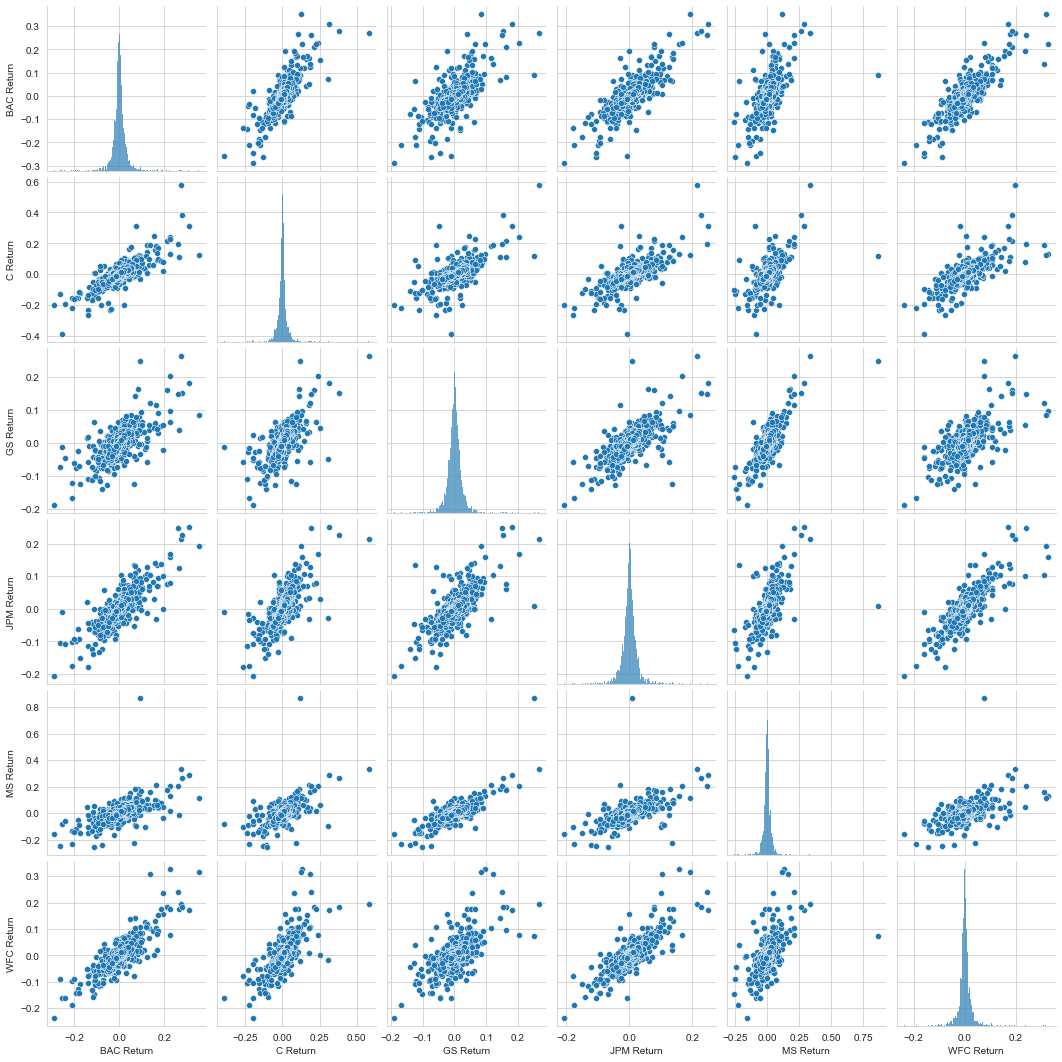

In [186]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [187]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [188]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [189]:
returns.std()

BAC Return    0.036604
C Return      0.038615
GS Return     0.025370
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [190]:
returns["2015-01-01":"2015-12-31"].std()

BAC Return    0.016146
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

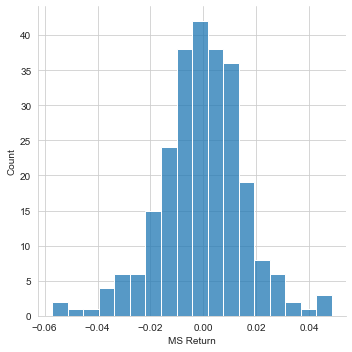

In [191]:
sns.displot(returns["2015-01-01":"2015-12-31"]["MS Return"])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

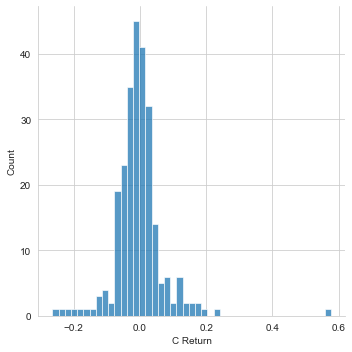

In [192]:
sns.displot(returns["2008-01-01":"2008-12-31"]["C Return"])

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

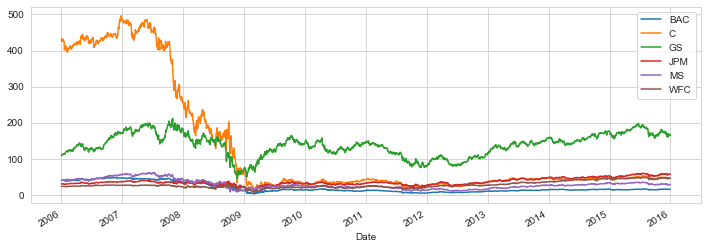

In [194]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label=tick, figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

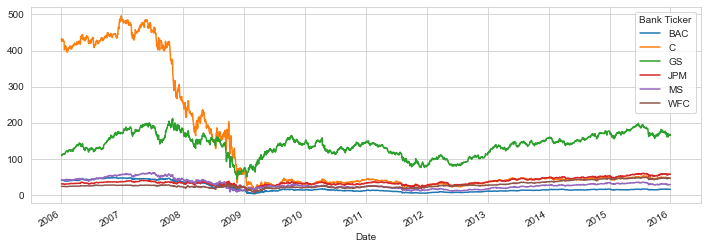

In [195]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").plot(figsize=(12,4))

In [196]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

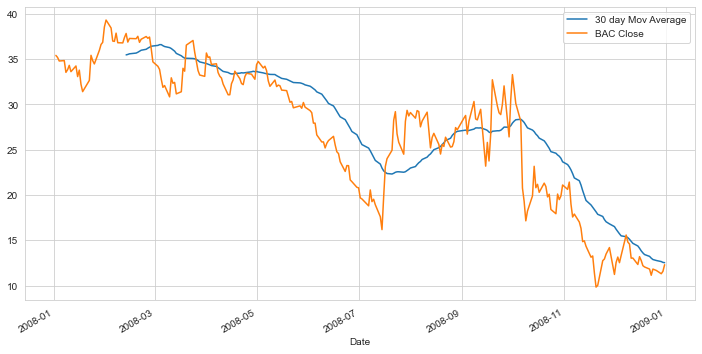

In [197]:
plt.figure(figsize=(12,6))
bank_stocks["2008-01-01":"2008-12-31"]["BAC"]["Close"].rolling(window=30).mean().plot(label="30 day Mov Average")
bank_stocks["2008-01-01":"2008-12-31"]["BAC"]["Close"].plot(label="BAC Close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [198]:
bank_stocks.xs(key="Close", axis=1,level="Stock Info").corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499726,0.019833,0.927576,-0.038153
C,0.970862,1.000000,0.376065,-0.081900,0.888669,-0.121582
GS,0.499726,0.376065,1.000000,0.691695,0.729948,0.557877
JPM,0.019833,-0.081900,0.691695,1.000000,0.245855,0.961907
MS,0.927576,0.888669,0.729948,0.245855,1.000000,0.159569
WFC,-0.038153,-0.121582,0.557877,0.961907,0.159569,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

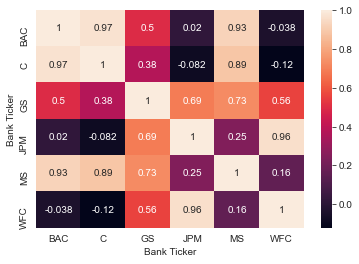

In [199]:
sns.heatmap(bank_stocks.xs(key="Close", axis=1,level="Stock Info").corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

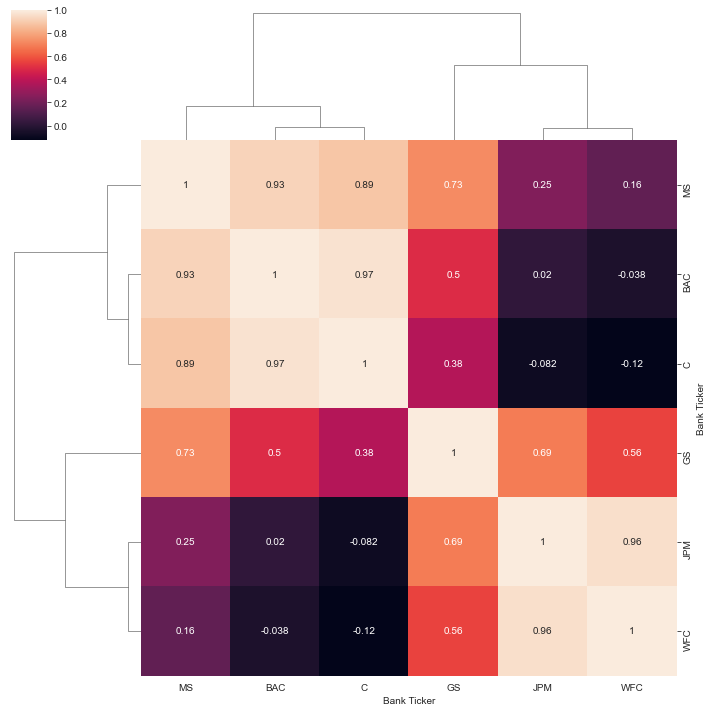

In [200]:
sns.clustermap(bank_stocks.xs(key="Close", axis=1,level="Stock Info").corr(), annot=True)

In [201]:
close_corr = bank_stocks.xs(key="Close", axis=1,level="Stock Info").corr()
close_corr.iplot(kind="heatmap", colorscale="Rdbu")

# Part 2 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [205]:
bac15 = bank_stocks["2015-01-01":"2016-01-01"]["BAC"]
bac15.iplot(kind="candle")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [206]:
bank_stocks["2015-01-01":"2016-01-01"]["MS"]["Close"].ta_plot(study="sma", periods=[13,21,55])


**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [207]:
bank_stocks["2015-01-01":"2016-01-01"]["BAC"]["Close"].ta_plot(study="boll")
